# Lecture 19: ML for color images

Plan:
1. Set up imports
2. Load CIFAR-10 images data using pickle
3. Write a function to view an image
4. Train/test split
5. Model fitting
6. Accuracy Evaluation
7. Activity: Make a plot of a given hyperparameter's effect on accuracy

In [1]:
# set up imports
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [3]:
# get image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

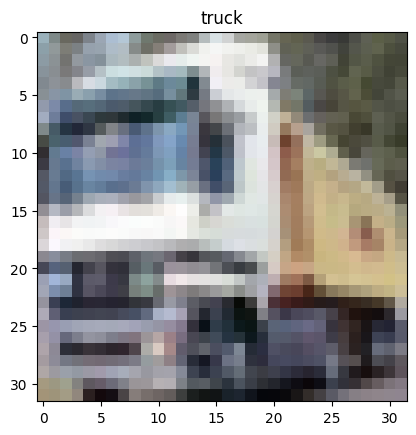

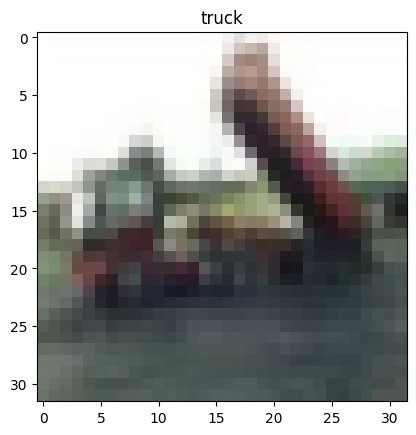

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(image, label):
    # reshape the image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    # reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    # show image
    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

# test the function
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [ ]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

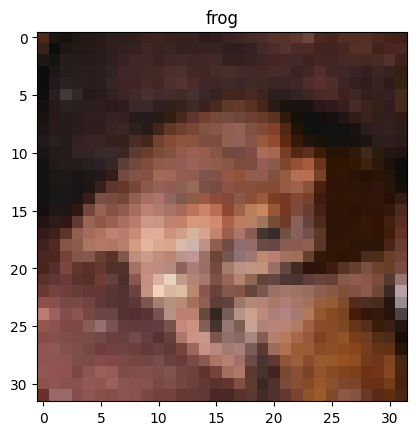

In [10]:
show_image(X_test[0], y_test[0])

In [6]:
# define our model
clf = RandomForestClassifier(random_state=42)

# train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# make predictions
y_pred = clf.predict(X_test)

# determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.408

In [15]:
len(y_test)

2500

The predicted label was automobile and the true label is truck


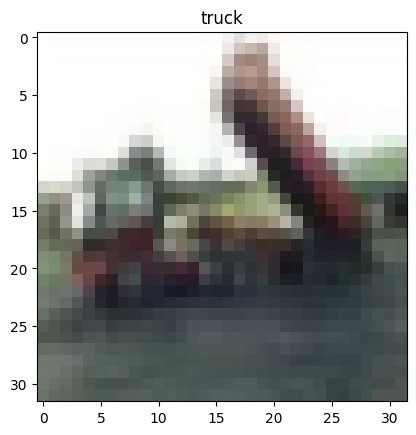

The predicted label was ship and the true label is truck


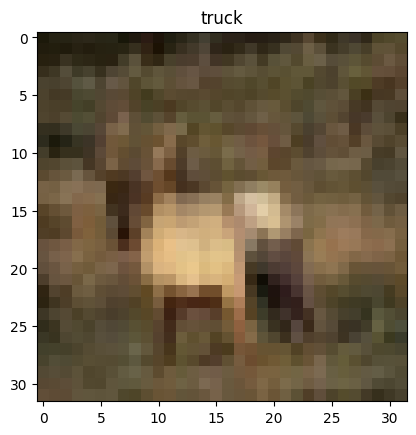

The predicted label was dog and the true label is automobile


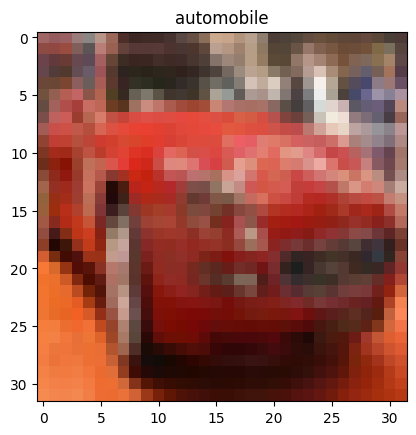

The predicted label was airplane and the true label is horse


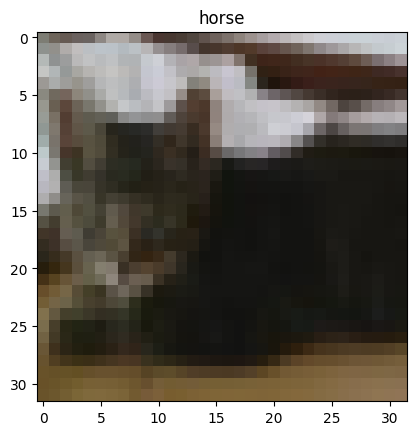

The predicted label was horse and the true label is dog


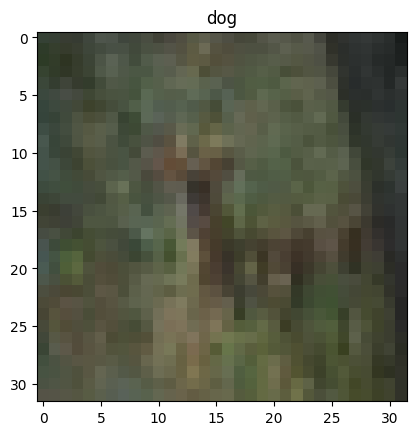

The predicted label was cat and the true label is horse


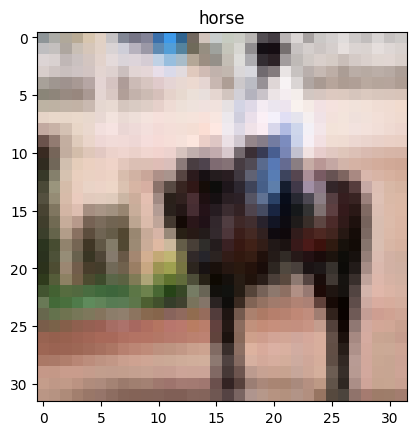

The predicted label was deer and the true label is airplane


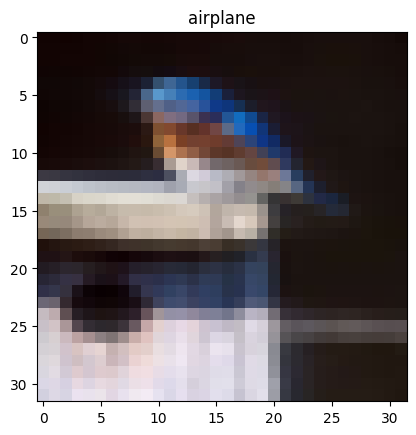

The predicted label was dog and the true label is airplane


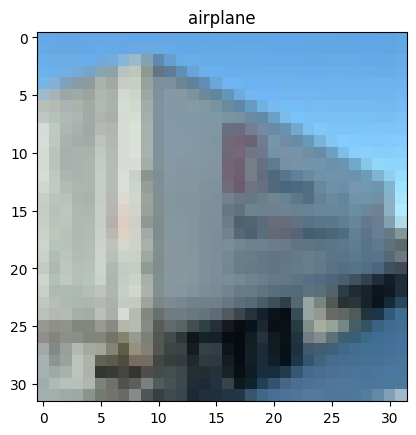

The predicted label was horse and the true label is truck


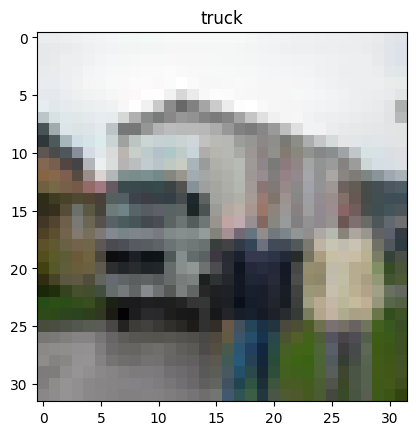

In [12]:
# display first 10 incorrect predictions
num_incorrect = 0

# loop over labels and images
for pred_label, true_label, image in zip(y_test, y_pred, image_data):
    # check for incorrect label prediction
    if true_label != pred_label:
        num_incorrect = num_incorrect + 1

        if num_incorrect < 10:
            print(f'The predicted label was {label_names[pred_label]} and the true label is {label_names[true_label]}')
            show_image(image, true_label)

In [17]:
# make a line plot of n_estimators vs. accuracy scores
n_estimators_values = [1, 5, 25, 100, 200]
accuracy_score_values = []

for n_estimators_val in n_estimators_values:
    print(n_estimators_val)

    # define the model (with the given number of estimators)
    clf = RandomForestClassifier(random_state=42, n_estimators=n_estimators_val)

    # train the model
    clf.fit(X_train, y_train)

    # get the predictions
    y_pred = clf.predict(X_test)

    # get the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # add accuracy to list
    accuracy_score_values.append(accuracy)

accuracy_score_values

1
5
25
100
200


[0.2112, 0.2684, 0.3608, 0.408, 0.43]

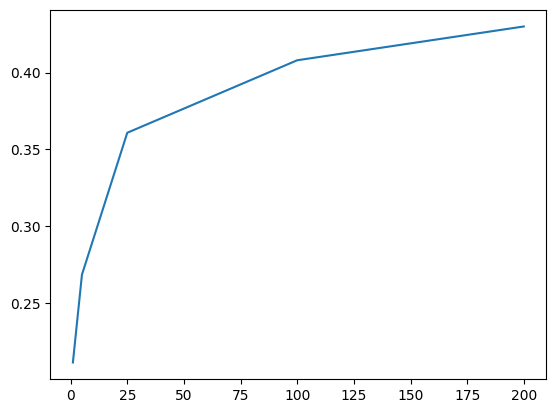

In [18]:
# plot the data
plt.plot(n_estimators_values, accuracy_score_values)